# Ewaluacja predykcji szeregów czasowych

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# from statsmodels.tsa.stattools import adfuller
# def check_time_series_stationary(y, rolling_len = 12):
    
#     y = pd.Series(y)
    
#     df_test = adfuller(y)
    
#     if df_test[1] < 0.05:
#         print('Szereg jest stacjonarny')
#     else:
#         print('Szereg jest niestacjonarny')
    
#     print("{0:^32s}".format("Dickey-Fuller Test"))
#     print("-"*32+"\n")
    
#     print("{0:<20s}: {1:>10.4f}".format('Test Statistic', df_test[0]))
#     print("{0:<20s}: {1:>10.4f}".format('p-value', df_test[1]))
#     print("-"*32+"\n")
    
#     rolling_mean = y.rolling(rolling_len).mean()
#     rolling_var = y.rolling(rolling_len).var()

#     plt.plot(y)
#     plt.plot(rolling_mean, label="Rolling mean")
#     plt.plot(rolling_var, label="Rolling var")
#     plt.legend()
#     plt.show()
    
#     print("{0:^32s}".format("Autocorrelation plot"))
#     print("-"*32+"\n")
#     pd.plotting.autocorrelation_plot(y)
#     plt.show()

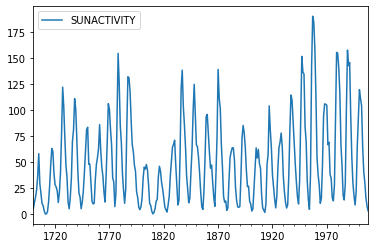

In [ ]:
sunspots = sm.datasets.sunspots.load_pandas().data
sunspots.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
sunspots = sunspots.drop('YEAR', axis=1)

sunspots.plot()

### Podział na część treningową i część testową

Ocena dokładności na podstawie tych samych danych, które były wykorzystane do konstrukcji prognozu, nie pozwala na w pełni wiarygodną ocenę skuteczności i może prowadzić do błędnych wniosków. Aby wiarygodnie porównać skuteczność różnych metod prognozowania, powinniśmy wykorzystać niezależne dane testowe.

W tym celu szereg dzielimy na:
- **część treningową** - wykorzystaną do dopasowania modelu i konstrukcji prognoz,
- **część testową** - wykorzystaną do oceny dokładności prognoz.

In [ ]:
k = int(sunspots.size * 0.8)

sunspots_train = sunspots[:k]
sunspots_test = sunspots[k:]

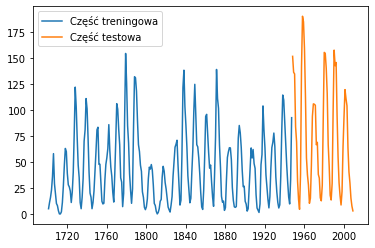

In [ ]:
plt.plot(sunspots_train, label="Część treningowa")
plt.plot(sunspots_test, label="Część testowa")
plt.legend()
plt.show()

In [ ]:
np.min(sunspots_test.index), np.max(sunspots_test.index)

(Timestamp('1947-12-31 00:00:00'), Timestamp('2008-12-31 00:00:00'))

In [ ]:
arma42 = ARIMA(sunspots_train, order=(4, 0, 2)).fit()
arma42_predict = arma42.predict(start='1947', end='2008', dynamic=True)

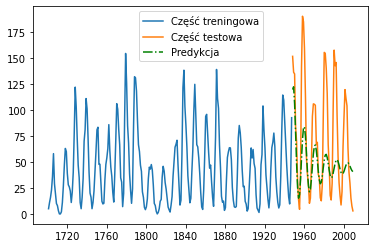

In [ ]:
plt.plot(sunspots_train, label="Część treningowa")
plt.plot(sunspots_test, label="Część testowa")
plt.plot(arma42_predict, 'g-.', label="Predykcja")
plt.legend()
plt.show()

## Zadanie 1

Napisz funkcję, która znajdzie najlepszy model ARMA - pamiętaj o podziale zbioru na część treningową i testową.

In [ ]:
# def mse(y, yhat):
#     return np.mean((y - yhat) ** 2)

# def mae(y, yhat):
#     return np.median(np.abs(y - yhat))

In [1]:
# def find_the_best_arma(ts, max_p = 10, max_q=10, split=0.8):
    
#     k = int(ts.size * split)
#     ts_train = ts[:k]
#     ts_test = ts[k:]

#     aic = np.zeros((max_p, max_q))
#     bic = np.zeros((max_p, max_q))
#     mse2 = np.zeros((max_p, max_q))
#     mae2 = np.zeros((max_p, max_q))
    
#     for i in range(max_p):
#         for j in range(max_q):
#             try:
#                 arma = ARIMA(ts_train, order=(i + 1, 0, j + 1)).fit()
#                 aic[i, j] = arma.aic
#                 bic[i, j] = arma.bic
#                 print('ARMA(%d, %d): AIC=%f, BIC=%f' % (i+1, j+1, arma.aic, arma.bic))

#                 arma_pred = arma.predict(start=str(np.min(ts_test.index).year), end=str(np.max(ts_test.index).year), 
#                                          dynamic=True)
#                 mse2[i, j] = mse(ts_test.values, arma_pred.values)
#                 mae2[i, j] = mae(ts_test.values, arma_pred.values)
#             except:
#                 aic[i, j] = bic[i, j] = mse2[i, j] = mae2[i, j] = np.Inf
            
#     print("-" * 30)
#     min_aic = np.min(aic)
#     min_arg_aic = np.argwhere(aic == min_aic)[0]
#     print("MINIMUM AIC=%f dla p=%d, q=%d" % (min_aic, min_arg_aic[0] + 1, min_arg_aic[1] + 1))
#     min_bic = np.min(bic)
#     min_arg_bic = np.argwhere(bic == min_bic)[0]
#     print("MINIMUM BIC=%f dla p=%d, q=%d" % (min_bic, min_arg_bic[0] + 1, min_arg_bic[1] + 1))
    
#     min_mse = np.min(mse2)
#     min_arg_mse = np.argwhere(mse2 == min_mse)[0]
#     print("MINIMUM MSE=%f dla p=%d, q=%d" % (min_mse, min_arg_mse[0] + 1, min_arg_mse[1] + 1))
    
#     min_mae = np.min(mae2)
#     min_arg_mae = np.argwhere(mae2 == min_mae)[0]
#     print("MINIMUM MAE=%f dla p=%d, q=%d" % (min_mae, min_arg_mae[0] + 1, min_arg_mae[1] + 1))

In [ ]:
#find_the_best_arma(sunspots, 5, 5) #szukamy modelu o najlepszym AIC, BIC, MSE i MAE (te dwie ostatnie wyliczone na zbiorze testowym)

In [ ]:
#k = int(sunspots.size * 0.8)
#sunspots_train = sunspots[:k]
#sunspots_test = sunspots[k:] #dzielimy w taki sposób, aby pokrywało się to z tym co w find_the_best_arma

In [ ]:
#lepsze dwa pierwsze modele

## Kroswalidacja

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

TRAIN: (0, 77)
TEST: (78, 154)


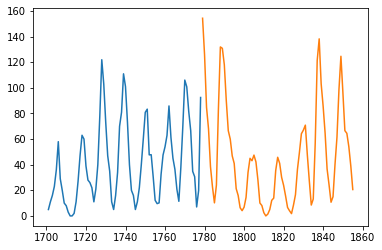

TRAIN: (0, 154)
TEST: (155, 231)


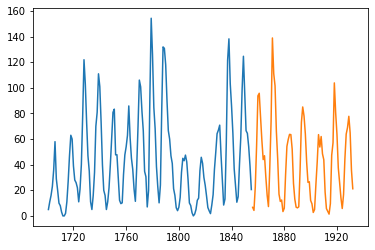

TRAIN: (0, 231)
TEST: (232, 308)


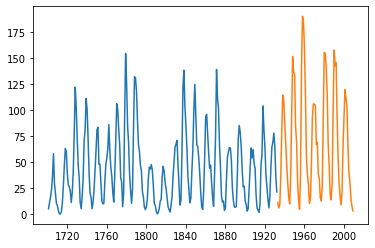

In [ ]:
tscv = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tscv.split(sunspots.values):
    print("TRAIN: (%d, %d)" % (min(train_index), max(train_index)))
    print("TEST: (%d, %d)" % (min(test_index), max(test_index)))
    
    train, test = sunspots.iloc[train_index], sunspots.iloc[test_index]
    plt.plot(train)
    plt.plot(test)
    plt.show()

In [ ]:
#kroswalidacja w szeregach czasowych wygląda nieco inaczej na początek bierzemy pierwszą jedną czwartą zbioru do uczenia i kolejną jedną czwartą do testowego
#następnie bierzemy pierwszą dwie czwarte zbioru do uczenia i kolejną jedną czwartą do testowego
#na koniec pierwszą trzy czwarte zbioru do uczenia i ostatnią jedną czwartą do testowego

## Zadanie 2

Napisz funkcję, która znajdzie najlepszy model ARMA - użyj kroswalidacji.

In [ ]:
# def find_the_best_arma_crossal(ts, max_p = 10, max_q=10, ar = False, cross=5):
#     tscv = TimeSeriesSplit(n_splits=cross)
    
#     aic = np.zeros((max_p + 1, max_q + 1))
#     bic = np.zeros((max_p + 1, max_q + 1))
#     mae_values = np.zeros((max_p + 1, max_q + 1))
#     mse_values = np.zeros((max_p + 1, max_q + 1))
    
#     for i in range(max_p + 1):
#         for j in range(max_q + 1):
#             if (i == j == 0):
#                 aic[0, 0] = bic[0, 0] = mae_values[0, 0] = mse_values[0, 0] = np.Inf
#             elif (i == 0) | ((not ar) & (j == 0)):
#                 aic[i, j] = bic[i, j] = mae_values[i, j] = mse_values[i, j] = np.Inf
#             else:
#                 aic_cross, bic_cross, mse_cross, mae_cross = [], [], [], []
#                 for train_index, test_index in tscv.split(ts.values):
#                     train, test = ts.iloc[train_index], ts.iloc[test_index]
#                     arma = ARIMA(train, order=(i, 0, j)).fit()
#                     aic_cross.append(arma.aic)
#                     bic_cross.append(arma.bic)
#                     pred = arma.predict(start=str(np.min(test.index).year), end=str(np.max(test.index).year), dynamic=True)
#                     mse_cross.append(mse(test.values, pred.values))
#                     mae_cross.append(mae(test.values, pred.values))
                    
#                 aic[i, j] = np.mean(aic_cross)
#                 bic[i, j] = np.mean(arma.bic)
#                 mae_values[i, j] = np.nanmean(mae_cross)
#                 mse_values[i, j] = np.nanmean(mse_cross)
#                 print("ARMA(%d, %d): AIC=%f; BIC=%f; MSE=%f; MAE=%f" % (i, j, arma.aic, arma.bic, 
#                                                                         mse_values[i, j], mae_values[i, j]))

#     print("-" * 30)
#     min_aic = np.nanmin(aic)
#     min_arg_aic = np.argwhere(aic == min_aic)[0] 
#     print("MINIMUM AIC=%f for p=%d, q=%d" % (min_aic, min_arg_aic[0], min_arg_aic[1]))
    
#     min_bic = np.nanmin(bic)
#     min_arg_bic = np.argwhere(bic == min_bic)[0] 
#     print("MINIMUM BIC=%f for p=%d, q=%d" % (min_bic, min_arg_bic[0], min_arg_bic[1]))
    
#     min_mse = np.nanmin(mse_values)
#     min_arg_mse = np.argwhere(mse_values == min_mse)[0]
#     print("MINIMUM MSE=%f for p=%d, q=%d" % (min_mse, min_arg_mse[0], min_arg_mse[1]))
    
#     min_mae = np.nanmin(mae_values)
#     min_arg_mae = np.argwhere(mae_values == min_mae)[0]
#     print("MINIMUM MAE=%f for p=%d, q=%d" % (min_mae, min_arg_mae[0], min_arg_mae[1]))

In [ ]:
# k = int(sunspots.size * 0.9)

# sunspots_train = sunspots[:k]
# sunspots_test = sunspots[k:]

# find_the_best_arma_crossal(sunspots_train, 3, 3, cross=4)
# #tutaj mamy to zrobione dokładnie tak jak powinniśmy przeprowadzać dopasowanie modelu. Dzielimy zbiór na treningowy i testowy
# #na treningowym robimy kroswalidację to znaczy w każdym obrocie pętli na części zbioru dopasowujemy model a na kolejnej części licząc na niej MSE, czy MAE sprawdzamy
# #który z modeli jest najlepszy
# #później użyjemy testowego, który nie był w kroswalidacji do sprawdzenia jakości predykcji 

ARMA(1, 1): AIC=1902.762927; BIC=1916.391614; MSE=1702.121447; MAE=25.603712
ARMA(1, 2): AIC=1871.780311; BIC=1888.816170; MSE=1683.167923; MAE=25.988516
ARMA(1, 3): AIC=1868.624655; BIC=1889.067686; MSE=1680.065095; MAE=26.034466
ARMA(2, 1): AIC=1847.607253; BIC=1864.643112; MSE=1658.832458; MAE=26.486434
ARMA(2, 2): AIC=1849.437828; BIC=1869.880858; MSE=1660.214927; MAE=26.472607
ARMA(2, 3): AIC=1851.376935; BIC=1875.227137; MSE=1680.062456; MAE=26.208751
ARMA(3, 1): AIC=1848.043020; BIC=1868.486051; MSE=1656.798393; MAE=26.422455
ARMA(3, 2): AIC=1849.925074; BIC=1873.775277; MSE=1657.123772; MAE=26.434088
ARMA(3, 3): AIC=1851.512706; BIC=1878.770080; MSE=1658.443223; MAE=26.386437
------------------------------
MINIMUM AIC=1161.683994 for p=3, q=1
MINIMUM BIC=1864.643112 for p=2, q=1
MINIMUM MSE=1656.798393 for p=3, q=1
MINIMUM MAE=25.603712 for p=1, q=1


# Predykcja z wykorzystaniem danych historycznych

In [ ]:
#tutaj tworzymy predykcję dla obserwacji na podstawie struktury opisanej w modelu i konkretnych danych, które mają wcześniejsze indeksy czasowe
#w kolejnym kroku nie bierzemy predykcji, którą uzyskaliśmy, tylko prawdziwą wartość szeregu 

In [ ]:
# history = sunspots_train.values.tolist()
# prediction = []
# simple_prediction = []
# errors = []
# test = sunspots_test.values

# for t in range(len(test)):
#     model = ARIMA(history, order=(2, 0, 1)).fit()
#     pred = model.forecast()[0]
    
#     prediction.append(pred[0])
#     simple_prediction.append(history[-1][0])
#     history.append(test[t])
    
#     errors.append((pred[0] - test[t])**2)

In [ ]:
# plt.figure(figsize=(20, 10))

# plt.plot(sunspots_train)
# plt.plot(sunspots_test, 'g-', label="Test")
# plt.plot(pd.Series(prediction, index=sunspots_test.index), 'r--', label="Dynamic prediction")
# #plt.plot(pd.Series(simple_prediction, index=sunspots_test.index), 'm.-', label="Naive prediction") #naiwna predykcja to wzięcie po prostu 
# #wcześniejszej obserwacji jako predykcji następnej
# plt.legend()
# plt.show()
# #widzimy, że predykcja jest przesunięta o 1 - nie jest dobra

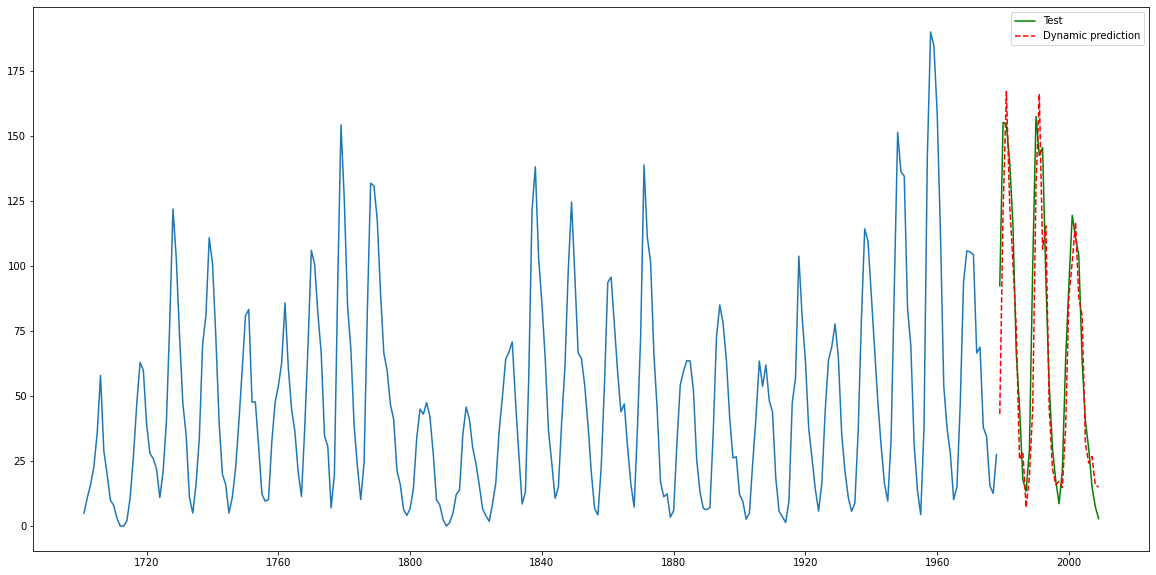